In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Training samples:",len(x_train))
print("Testing samples:",len(x_test))

Training samples: 25000
Testing samples: 25000


In [ ]:
maxlen=100
x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=10000,output_dim=32,input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 966,341 (3.69 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644,228 (2.46 MB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6403 - loss: 0.6038 - val_accuracy: 0.8098 - val_loss: 0.4215
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8773 - loss: 0.3073 - val_accuracy: 0.8280 - val_loss: 0.3945
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9226 - loss: 0.2074 - val_accuracy: 0.8338 - val_loss: 0.4056
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9589 - loss: 0.1262 - val_accuracy: 0.8202 - val_loss: 0.4809
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9833 - loss: 0.0571 - val_accuracy: 0.8018 - val_loss: 0.5855


In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Accuracy:{accuracy*100:2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8007 - loss: 0.5834
Test Accuracy:80.195999


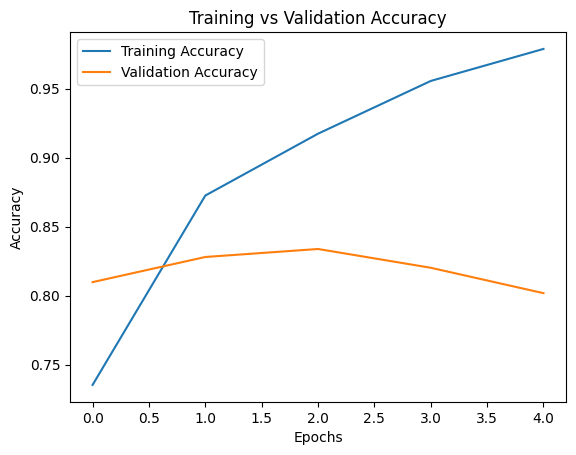

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()